# Do Stock Market Returns Drive Economic Output? Implications for GDP Growth, Inflation, and Interest Rates

## Financial Econometrics coursework 1  - TEAM 11S

#### This analysis explores the relationship between stock market returns and macroeconomic indicators, focusing on GDP growth, inflation, and interest rates. Using quarterly data from 1957 to 2024, we employ econometric methods to assess how stock market fluctuations correlate with economic output. The results indicate significant impacts of inflation and interest rates on GDP, while stock market returns show no short-term effect, reflecting the complexity of their economic influence

# Data

In [2]:
# We start by importing the neccesary libraries

from lib import *

In [3]:
# import the data as a pandas dataframe

data = pd.read_csv('cw-data.csv')
print(data.head())

#because we are dealing with quartelry data (time series data) we need to convert the date column to a datetime object and set it as the index of the dataframe
data['date'] = pd.to_datetime(data['date'], infer_datetime_format= True)
indexed_data = data.set_index(['date'])

         date   return  GDP_growth  inflation   FFR
0  1957-04-01  7.04544     1.98098    3.53591  3.00
1  1957-07-01 -6.79407     3.07278    3.54662  3.47
2  1957-10-01 -7.28927     0.35470    3.04017  2.98
3  1958-01-01  2.94839    -2.87229    3.62527  1.20
4  1958-04-01  5.01195    -2.01954    2.84596  0.93


In [4]:
#Check if the data is imported correctly and the date column is set as the index

from datetime import datetime
indexed_data.head(20)

,return,GDP_growth,inflation,FFR
date,,,,
1957-04-01,7.04544,1.98098,3.53591,3.00
1957-07-01,-6.79407,3.07278,3.54662,3.47
1957-10-01,-7.28927,0.35470,3.04017,2.98
1958-01-01,2.94839,-2.87229,3.62527,1.20
1958-04-01,5.01195,-2.01954,2.84596,0.93
1958-07-01,10.45452,-0.72596,2.08333,1.76
1958-10-01,8.64200,2.65733,1.75623,2.42
1959-01-01,7.38636,7.41511,0.34638,2.80
1959-04-01,3.70368,9.11883,0.69180,3.39


## Data visualisation and descriptive statistics

In [5]:
#Summary statistics
print(indexed_data.describe(include='all'))

# We export the summary statistics to a CSV file to include in the report
indexed_data.describe(include='all').to_csv('summary_statistics.csv')

           return  GDP_growth   inflation         FFR
count  269.000000  269.000000  269.000000  269.000000
mean     1.866782    3.018618    3.705993    4.718178
std      7.424930    2.432065    2.792642    3.618868
min    -30.153550   -7.502370   -1.377940    0.070000
25%     -1.196260    1.805760    1.756230    1.880000
50%      2.686580    3.009140    2.982460    4.590000
75%      5.745090    4.341950    4.673650    6.400000
max     26.286780   12.239260   14.592270   19.100000


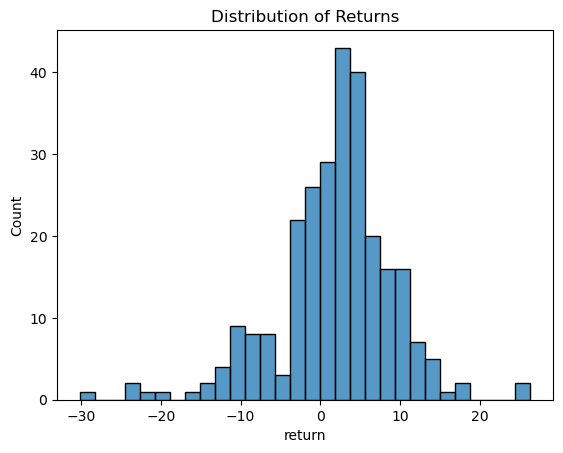

None


In [6]:
# we ue the seaborn library to plot the histogram of the returns
import seaborn as sns

# We plot the distribution of the returns using a histogram
sns.histplot(data['return'], bins=30)
plt.title('Distribution of Returns')
print(plt.show())


## We construct a line plot using GDP growth, interest rates and inflation 

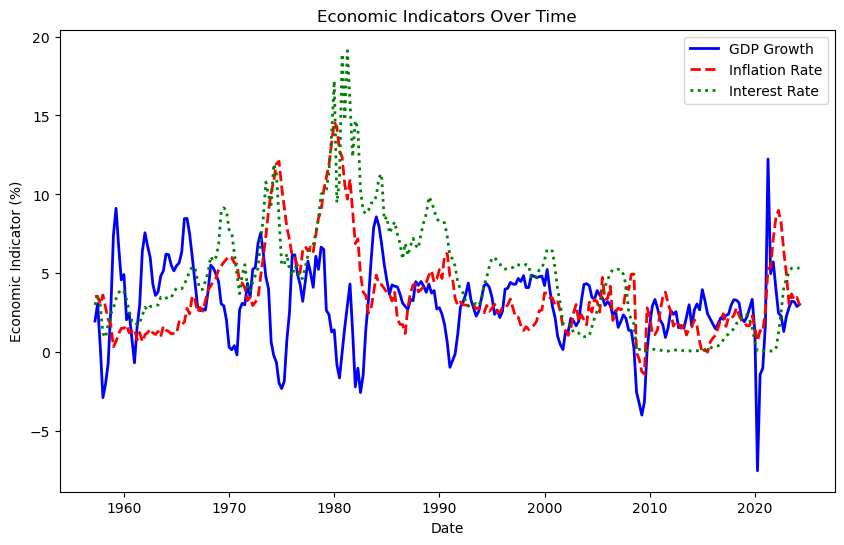

In [7]:

import matplotlib.pyplot as plt

# Create a plot with all time series

plt.figure(figsize=(10, 6))  # Set figure size for better visibility

# Plotting GDP Growth
plt.plot(indexed_data['GDP_growth'], label='GDP Growth', color='b', linestyle='-', linewidth=2)

# Plotting Inflation Rate
plt.plot(indexed_data['inflation'], label='Inflation Rate', color='r', linestyle='--', linewidth=2)

# Plotting Interest Rate
plt.plot(indexed_data['FFR'], label='Interest Rate', color='g', linestyle=':', linewidth=2)

# Adding labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Economic Indicator (%)')
plt.title('Economic Indicators Over Time')
plt.legend() 

# Display the plot
plt.show()

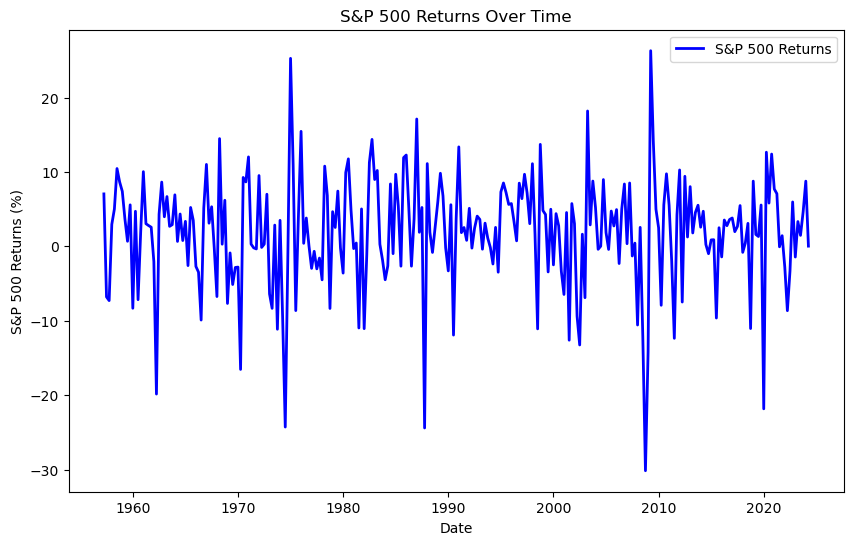

In [8]:
#Plot the S&P 500 returns 

plt.figure(figsize=(10, 6))  # Set figure size for better visibility
plt.plot(indexed_data['return'], label='S&P 500 Returns', color='b', linestyle='-', linewidth=2)
plt.xlabel('Date')
plt.ylabel('S&P 500 Returns (%)')
plt.title('S&P 500 Returns Over Time')
plt.legend()
plt.show()

## Testing for Stationarity

As we are dealing with time series data, we must explore the stationarity of our data. 

First, we plot the autocorrelation functions on a graph so we can see how rapidly the ACF's are decaying. 
Second, we test for stationarity using Augumented Dickey Fuller and KPSS. 
Lastly, we apply first differences for the variables who are not stationary at level. 



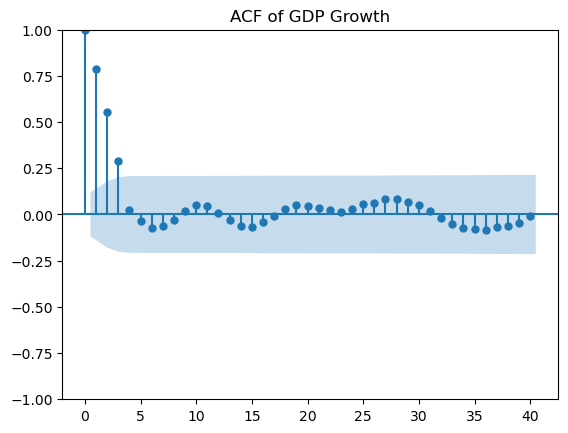

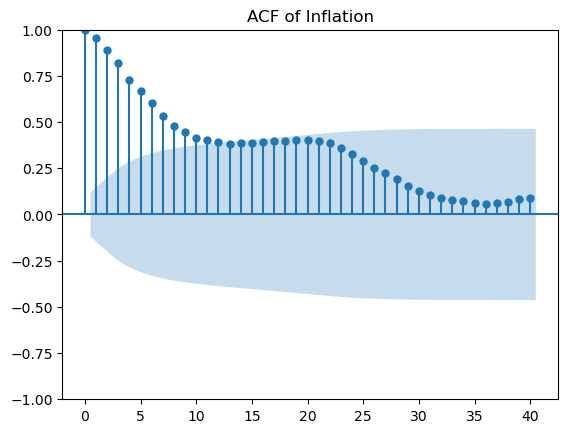

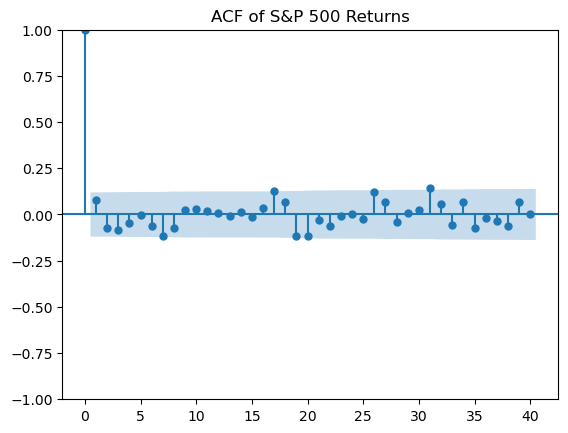

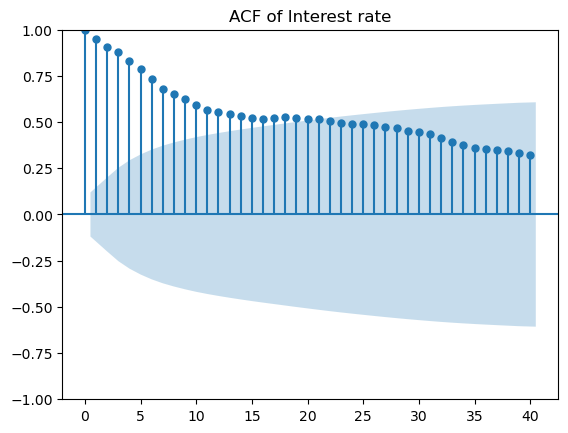

In [9]:
#Import the packages for plotting the autocrrelation and partial autocorrelation  
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Plot the autocorrelation of the GDP growth data

plot_acf(data['GDP_growth'], lags=40)
plt.title('ACF of GDP Growth')
plot_acf(data['inflation'], lags=40)
plt.title('ACF of Inflation')
plot_acf(data['return'], lags=40)
plt.title('ACF of S&P 500 Returns')
plot_acf(data['FFR'], lags=40)
plt.title('ACF of Interest rate')

plt.show()

In [10]:
#Conduct the Augumented Dickey Fuller test to check for stationarity of the GDP growth data
from statsmodels.tsa.stattools import adfuller

adftest = adfuller(data['GDP_growth'], autolag='AIC', regression='ct')

print("ADF Test Results")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values:", adftest[4])


ADF Test Results
ADF-Statistic: -3.7313483762113995
P-Value: 0.020374104410931463
Number of lags: 16
Number of observations: 252
Critical Values: {'1%': -3.9951510399519887, '5%': -3.4280573478136107, '10%': -3.1373735230776614}


In [11]:
adftest = adfuller(data['FFR'], autolag='AIC', regression='ct')


print("ADF Test Results")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values:", adftest[4])

## Data is non stationary at level

ADF Test Results
ADF-Statistic: -2.435351969118596
P-Value: 0.36099996672428647
Number of lags: 8
Number of observations: 260
Critical Values: {'1%': -3.99401778078061, '5%': -3.427512404073737, '10%': -3.1370539508420574}


In [12]:
adftest = adfuller(data['inflation'], autolag='AIC', regression='ct')

print("ADF Test Results")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values:", adftest[4])

## Data is non-stationary at level 

ADF Test Results
ADF-Statistic: -2.069751238760236
P-Value: 0.5629880928222353
Number of lags: 16
Number of observations: 252
Critical Values: {'1%': -3.9951510399519887, '5%': -3.4280573478136107, '10%': -3.1373735230776614}


In [13]:
adftest = adfuller(data['return'], autolag='AIC', regression='ct')

print("ADF Test Results")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values:", adftest[4])

## Data is stationary if the p-value is less than 0.05

ADF Test Results
ADF-Statistic: -15.102387434782027
P-Value: 1.9545562692114312e-22
Number of lags: 0
Number of observations: 268
Critical Values: {'1%': -3.992952994240897, '5%': -3.4270002543156903, '10%': -3.1367535713335752}


In [14]:
# We import the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test from the statsmodels library

from statsmodels.tsa.stattools import kpss

# Function to conduct the KPSS test and print the results 
def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')

# Test for stationarity of GDP growth data
print("KPSS Test for GDP Growth:")
kpss_test(data['GDP_growth'], regression='c')

# Test for stationarity of FFR data
print("\nKPSS Test for FFR:")
kpss_test(data['FFR'], regression='c')

# Test for stationarity of Inflation data
print("\nKPSS Test for Inflation:")
kpss_test(data['inflation'], regression='c')

# Test for stationarity of S&P 500 returns data
print("\nKPSS Test for S&P 500 Returns:")
kpss_test(data['return'], regression='c')

KPSS Test for GDP Growth:
KPSS Statistic: 0.44763017934000754
p-value: 0.05662492269827262
num lags: 8
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739

KPSS Test for FFR:
KPSS Statistic: 0.9015323900358625
p-value: 0.01
num lags: 10
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739

KPSS Test for Inflation:
KPSS Statistic: 0.4305988808991854
p-value: 0.06396599961242008
num lags: 10
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739

KPSS Test for S&P 500 Returns:
KPSS Statistic: 0.0564538535576891
p-value: 0.1
num lags: 6
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739


/var/folders/6p/w656sb2s0hz7rlnsgzxx4yyc0000gn/T/ipykernel_31379/497001611.py:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)
/var/folders/6p/w656sb2s0hz7rlnsgzxx4yyc0000gn/T/ipykernel_31379/497001611.py:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)


### We transform the non stationary data to stationary using first differences 

In [15]:
# Transform FFR and inflation into stationary series by taking the first difference
data['FFR_diff'] = data['FFR'].diff()
data['inflation_diff'] = data['inflation'].diff()

# Drop NaN values resulting from differencing
data = data.dropna(subset=['FFR_diff', 'inflation_diff'])

# Display the first few rows of the transformed data
print(data[['FFR_diff', 'inflation_diff']].head())

   FFR_diff  inflation_diff
1      0.47         0.01071
2     -0.49        -0.50645
3     -1.78         0.58510
4     -0.27        -0.77931
5      0.83        -0.76263


### Specifing the regression model 

$$ y_t=α+β_1 X_1+β_2 X_2+β_3 X_3+ϵ_t $$

In [16]:
# Rename the collumn return to returns because return is a reserved keyword in python
data = data.rename(columns={'return': 'returns'})

# Run the OLS 
slr1 = smf.ols(formula="GDP_growth ~ inflation_diff + FFR_diff + returns", data = data).fit()

# Print summary of regression results
print(slr1.summary())

# Export the regression results summary to a text file for the report
with open('regression_summary.txt', 'w') as f:
    # Extracting specific details from the regression summary
    summary_df = pd.DataFrame({
        'Coef.': slr1.params,
        'Std.Err.': slr1.bse,
        't': slr1.tvalues,
        'P>|t|': slr1.pvalues,
        '[0.025': slr1.conf_int()[0],
        '0.975]': slr1.conf_int()[1]
    })
    
    # Adding R-squared and Adjusted R-squared to the summary
    summary_df.loc['R-squared'] = [slr1.rsquared, '', '', '', '', '']
    summary_df.loc['Adj. R-squared'] = [slr1.rsquared_adj, '', '', '', '', '']
    
    # Writing the simplified summary to the text file
    f.write(summary_df.to_string())

                            OLS Regression Results                            
Dep. Variable:             GDP_growth   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     12.31
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           1.46e-07
Time:                        13:01:48   Log-Likelihood:                -600.83
No. Observations:                 268   AIC:                             1210.
Df Residuals:                     264   BIC:                             1224.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.0376      0.144     21.

### Homoskedasticity and Normality 

In [17]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform the Breusch-Pagan test
bp_test = het_breuschpagan(slr1.resid, slr1.model.exog)

# Extract the test results
bp_test_stat = bp_test[0]
bp_test_pvalue = bp_test[1]

print(f'Breusch-Pagan test statistic: {bp_test_stat}')
print(f'Breusch-Pagan test p-value: {bp_test_pvalue}')

# Check for homoskedasticity
if bp_test_pvalue > 0.05:
    print("The residuals are homoskedastic (fail to reject the null hypothesis of the Breusch-Pagan test).")
else:
    print("The residuals are heteroskedastic (reject the null hypothesis of the Breusch-Pagan test).")

Breusch-Pagan test statistic: 5.69338832985429
Breusch-Pagan test p-value: 0.12751866992126376
The residuals are homoskedastic (fail to reject the null hypothesis of the Breusch-Pagan test).


In [18]:
# Assuming y1 and y2 are dependent variables and fit1 and fit2 are fitted values from regression models
y1 = data['GDP_growth']
y2 = data['returns']

# Fit regression models (example)
fit1 = smf.ols('GDP_growth ~ inflation + FFR', data=data).fit().fittedvalues
fit2 = smf.ols('returns ~ inflation + FFR', data=data).fit().fittedvalues

# predict the residuals
residuals1 = y1 - fit1
residuals2 = y2 - fit2

xs_with_constant = sm.add_constant(data[['inflation', 'FFR']])

# Test for normality using Jarque-Bera test

_, jb_pvalue1, _, _ = sm.stats.stattools.jarque_bera(residuals1)
_, jb_pvalue2, _, _ = sm.stats.stattools.jarque_bera(residuals2)
print("p-value for residuals1 being normal", jb_pvalue1)
print("p-value for residuals2 being normal", jb_pvalue2)

#Test for heteroskedasticity using Breusch-Pagan test
_, pvalue1, _, _ = smd.het_breuschpagan(residuals1, xs_with_constant)
_, pvalue2, _, _ = smd.het_breuschpagan(residuals2, xs_with_constant)
print("p-value for residuals1 being heteroskedastic", pvalue1)
print("p-value for residuals2 being heteroskedastic", pvalue2)

p-value for residuals1 being normal 2.3970642983645626e-22
p-value for residuals2 being normal 1.774116278637884e-22
p-value for residuals1 being heteroskedastic 0.7174899947412128
p-value for residuals2 being heteroskedastic 0.4569427235572767


In [49]:
#test for autocorrelation
from statsmodels.stats.stattools import durbin_watson

# Calculate the Durbin-Watson statistic
durbin_watson_stat = durbin_watson(slr1.resid)

print(f'Durbin-Watson statistic: {durbin_watson_stat}')

Durbin-Watson statistic: 0.5764774742562


## Stock market returns and Interest rates 

In [ ]:
# We continue by running a simple linear regression model to investigate the relationship between the S&P 500 returns and the Federal Funds Rate (FFR)

# Run the OLS 
slr2 = smf.ols(formula="returns  ~ FFR_diff", data = data).fit()

# Print summary of regression results
print(slr2.summary())


                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.646
Date:                Mon, 04 Nov 2024   Prob (F-statistic):              0.201
Time:                        18:39:10   Log-Likelihood:                -916.50
No. Observations:                 268   AIC:                             1837.
Df Residuals:                     266   BIC:                             1844.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8519      0.453      4.084      0.0

Model is not significant

### We estimate another model using the returns as the dependent variable, interest rates as the independent variable while controling for inflation and GDP 

In [ ]:
# Model 2

slr2 = smf.ols(formula="returns  ~ FFR_diff + inflation_diff + GDP_growth ", data = data).fit()

# Print summary of regression results
print(slr2.summary())

                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     4.749
Date:                Mon, 04 Nov 2024   Prob (F-statistic):            0.00328
Time:                        19:55:38   Log-Likelihood:                -507.88
No. Observations:                 180   AIC:                             1024.
Df Residuals:                     176   BIC:                             1037.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.8270      0.666     10.

In [48]:
#test for autocorrelation
from statsmodels.stats.stattools import durbin_watson

# Calculate the Durbin-Watson statistic
durbin_watson_stat = durbin_watson(slr2.resid)

print(f'Durbin-Watson statistic: {durbin_watson_stat}')


Durbin-Watson statistic: 2.0887869750720327


#### To plot the returns and interest rate we need to convert them into log format because of the scale difference

In [34]:
# Convert FFR and Returns to log 
data['FFR_log'] = np.log(data['FFR'])
data['returns_log'] = np.log(data['returns'])
data.dropna(inplace=True)
print(data[['FFR_log', 'returns_log']].head())



    FFR_log  returns_log
3  0.182322     1.081259
4 -0.072571     1.611825
5  0.565314     2.347034
6  0.883768     2.156634
7  1.029619     1.999635


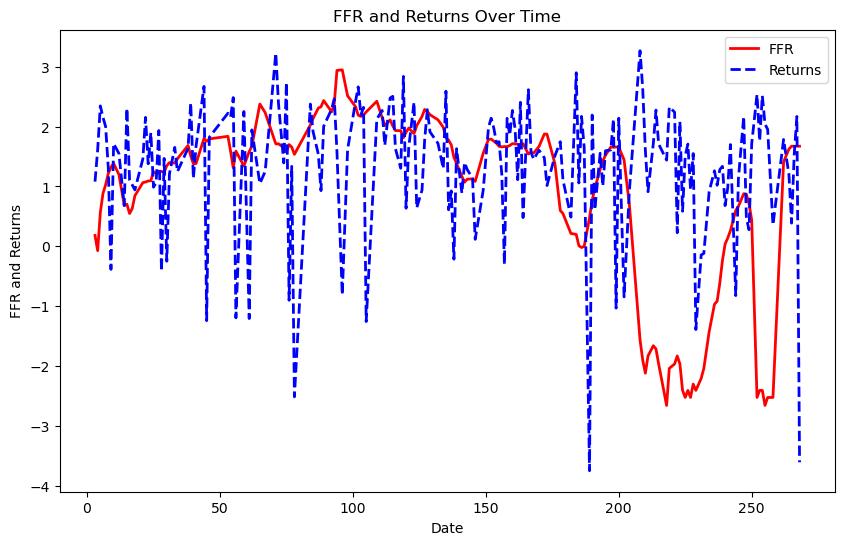

In [47]:
#Plot of FFR and Returns 
plt.figure(figsize=(10, 6))  
plt.plot(data['FFR_log'], label='FFR', color='r', linestyle='-', linewidth=2)
plt.plot(data['returns_log'], label='Returns', color='b', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('FFR and Returns')
plt.title('FFR and Returns Over Time')
plt.legend()
plt.show()